In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as skmodel
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
dataframe = pd.read_csv('relationship_status.csv')
# dataframe

In [4]:
attributes = ['is_above_35','is_below_18','is_between_25_and_35','is_between_18_and_24','enjoys_crowded','enjoys_nightlife','enjoys_outdoor','enjoys_nature','enjoys_museums_and_galleries','enjoys_culture_and_education','enjoys_books','is_religious','enjoys_calm','is_spritual','enjoys_self_care','enjoys_clothes_shopping','enjoys_physical_exercise','enjoys_sports','enjoys_restaurants','enjoys_grocery_shopping','hates_shopping','prefers_delivery','enjoys_movie_nights','likes_animals','in_relationship','is_open_top_partners_interests','discuss_future','partner_is_Thoughtful','partner_is_Compassionate','partner_is_Supportive','partner_is_Understanding','partner_is_Patient','partner_is_Dishonest','partner_is_Poor_communication_skills','partner_is_Un_empathetic','partner_is_Selfish','partner_is_Poor_temper_control','partner_is_Unreliable','partner_is_Close_minded','partner_is_Has_good_sense_of_humor','partner_is_Impatient','partner_is_Controlling','user_is_Thoughtful','user_is_Compassionate','user_is_Supportive','user_is_Understanding','user_is_Patient','user_is_Dishonest','user_is_Poor_communication_skills','user_is_Un_empathetic','user_is_Selfish','user_is_Poor_temper_control','user_is_Unreliable','user_is_Close_minded','user_is_Impatient','user_is_Controlling','couple_has_Communication','couple_has_Trust_and_Commitment','couple_has_Respect','couple_has_Support','couple_has_Shared_Values','couple_has_Intimacy','couple_has_Independence','couple_has_none','couple_enjoys_Outdoor_and_Nature_Activities','couple_enjoys_Social_and_Entertainment','couple_enjoys_physical_activity','couple_enjoys_Relaxation_and_Self_care','couple_enjoys_Spiritual_activities','couple_enjoys_Cultural_and_Educational','couple_enjoys_Entertainment','is_A_few_times_a_week','is_Every_once_in_a_while','is_very_busy','is_Every_day']

In [5]:
attribute_list = dataframe[attributes]
classification_label = dataframe['relationship_status']

In [6]:
attribute_train, attribute_test, class_train, class_test = skmodel.train_test_split(attribute_list, classification_label, test_size=0.2, random_state=0)

c:\Users\Dagher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Dagher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.22857142857142856
[3 0 2]
|--- feature_70 <= 0.50
|   |--- feature_20 <= 1.50
|   |   |--- feature_8 <= 1.50
|   |   |   |--- class: 2
|   |   |--- feature_8 >  1.50
|   |   |   |--- feature_23 <= 1.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_23 >  1.50
|   |   |   |   |--- feature_18 <= 4.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_18 >  4.50
|   |   |   |   |   |--- feature_14 <= 4.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_14 >  4.50
|   |   |   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_8 >  2.50
|   |   |   |   |   |   |   |--- class: 2
|   |--- feature_20 >  1.50
|   |   |--- feature_25 <= 4.50
|   |   |   |--- feature_12 <= 4.50
|   |   |   |   |--- feature_69 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_69 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_12 >  4.50
|   |   |   |   |--- feature_13 

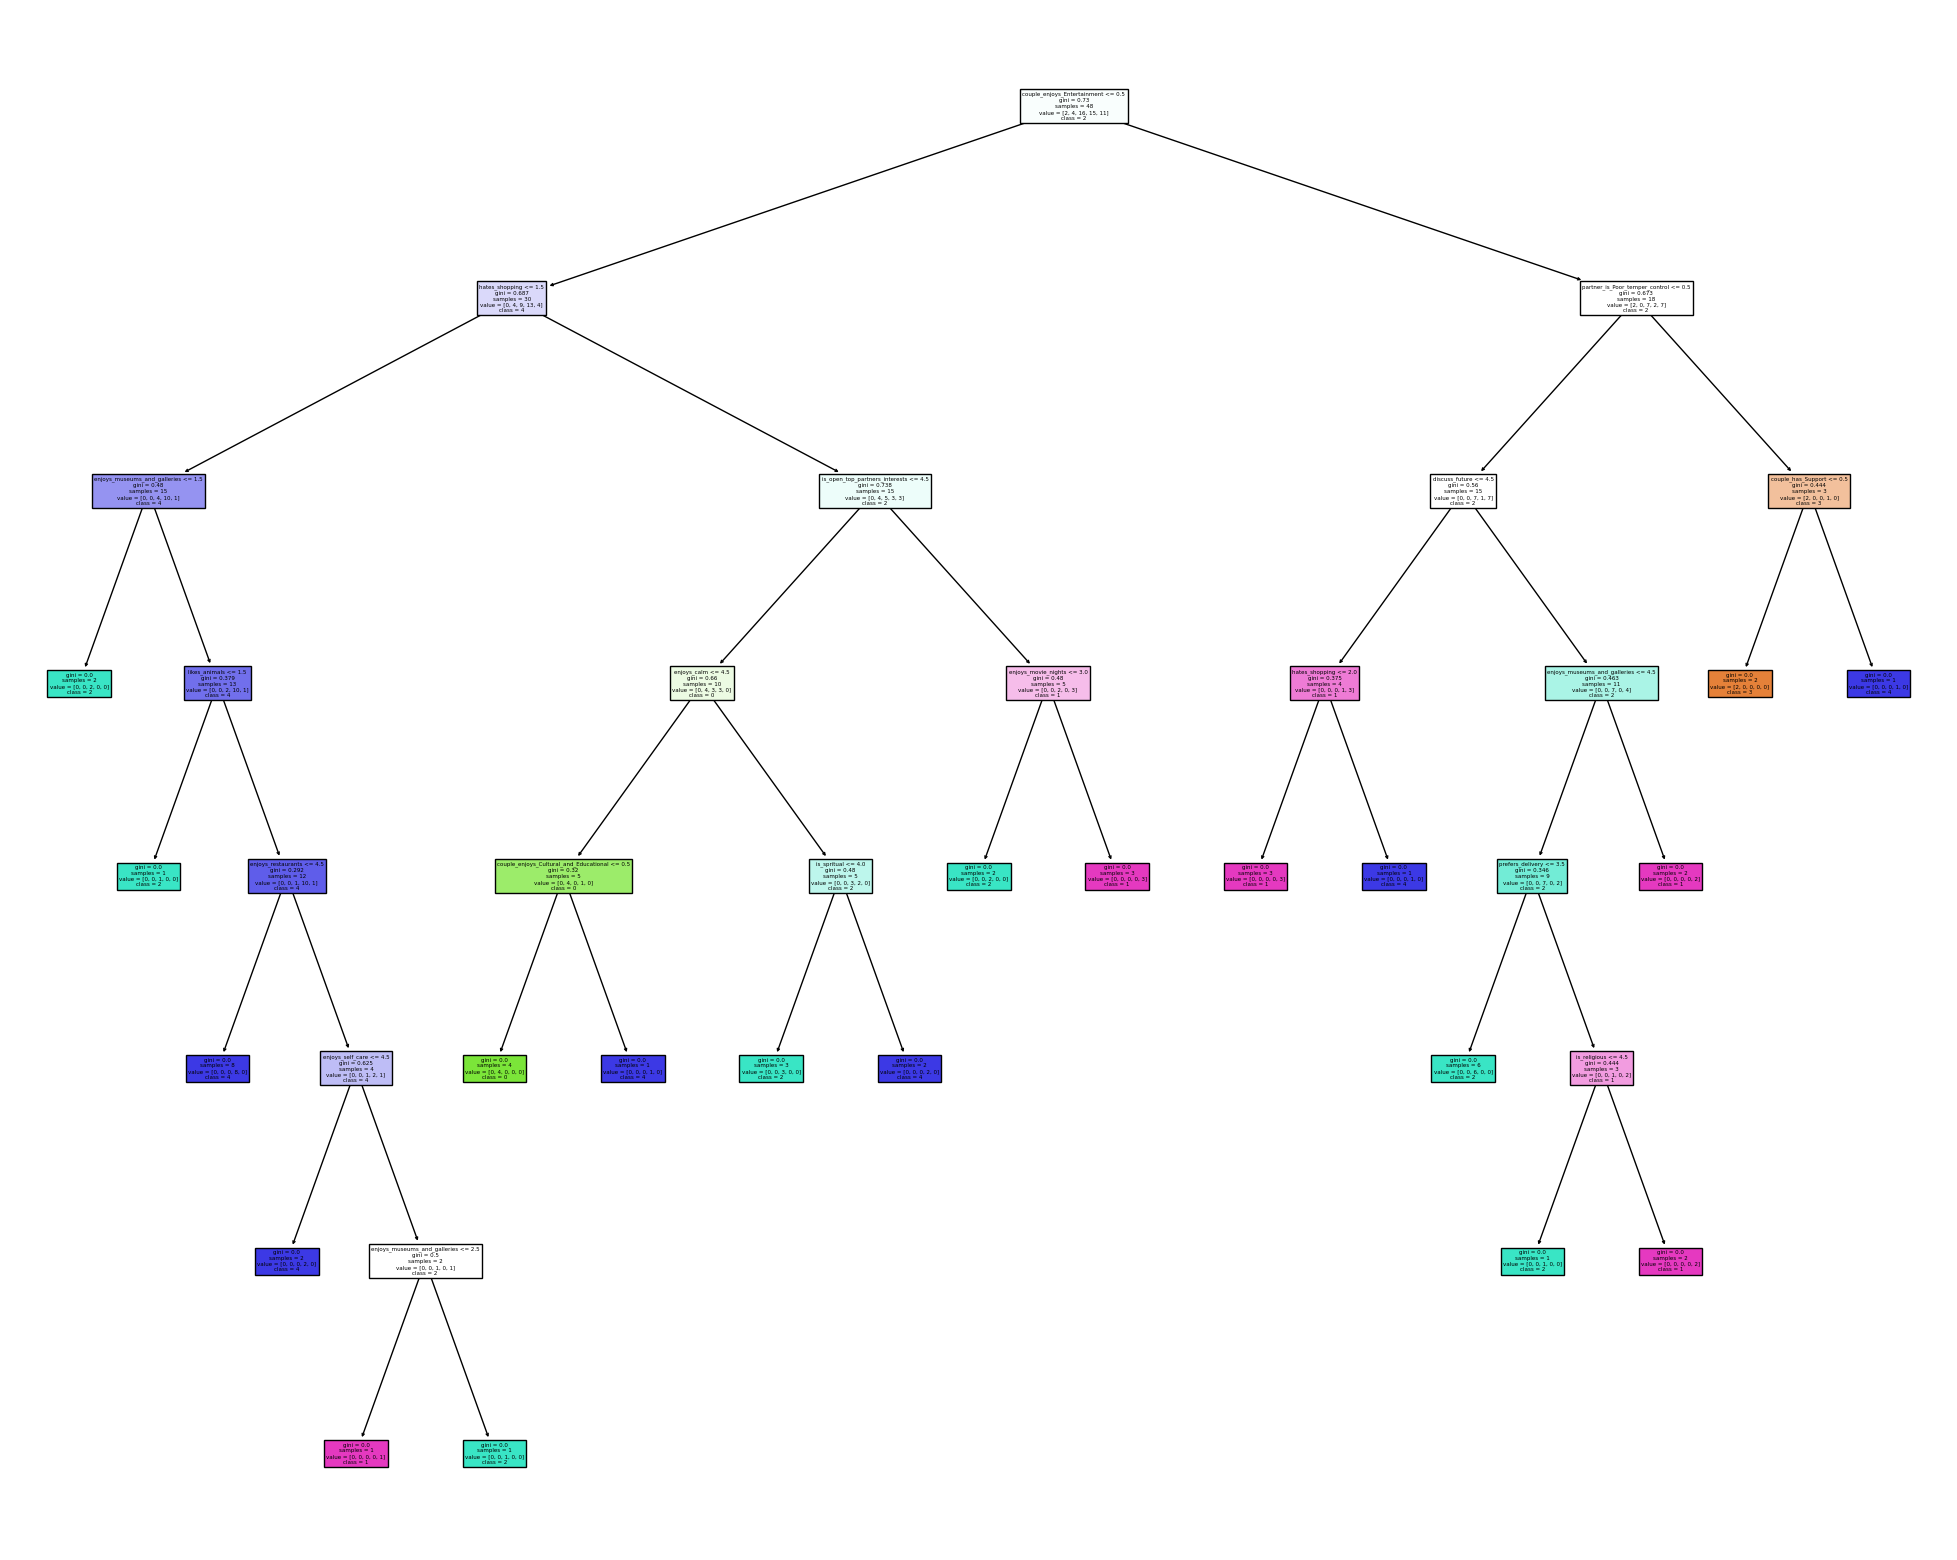

In [7]:
decision_tree = DecisionTreeClassifier().fit(attribute_train, class_train)
class_names_str = classification_label.astype(str).unique()
scores = skmodel.cross_val_score(decision_tree, attribute_list, classification_label, cv = 10)

value = scores.mean()

response = decision_tree.predict([
  ['0','0','0','1','4','5','4','5','2','3','1','5','3','3','4','2','4','4','4','3','4','3','5','5','1','4','5','1','0','1','1','0','0','1','0','0','0','0','0','0','1','0','1','0','1','1','0','0','0','0','0','1','0','0','1','0','1','0','1','0','0','1','0','0','1','1','1','0','0','1','0','1','0','0','0'],
  ['0','0','0','1','3','2','5','5','5','5','5','4','4','3','4','3','5','5','4','5','5','3','4','5','1','5','5','0','0','0','0','0','0','1','0','0','1','1','0','0','0','0','1','0','1','1','1','0','1','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','1','1','1','0','0','1','1','1','0','0','0'],
  ['0','0','0','1','5','5','5','5','3','5','5','4','2','5','5','1','5','5','5','1','1','1','5','5','1','5','5','0','0','1','0','1','0','0','0','0','0','0','0','0','0','0','0','0','1','1','1','0','0','0','0','0','0','0','0','0','1','1','1','1','0','1','0','0','0','0','0','1','1','0','0','0','1','0','0'
]], 
  ) #3,0,2

text_representation = tree.export_text(decision_tree)
print(value)
print(response)
# print(text_representation)

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(decision_tree, feature_names= attributes, class_names=class_names_str, filled=True)
plt.show()

In [8]:
# import arff

# # Assuming 'dataframe' is your pandas DataFrame
# with open('relationship_status.arff', 'w') as f:
#     arff.dump({
#         'data': dataframe.values.tolist(),
#         'attributes': [(col, 'REAL') for col in dataframe.columns],
#         'relation': 'relation name'
#     }, f)